In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris #sklearn自带数据集，直接导入下载
from sklearn.linear_model import LogisticRegression

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [2]:
#导入数据集,并查看
iris=load_iris()
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


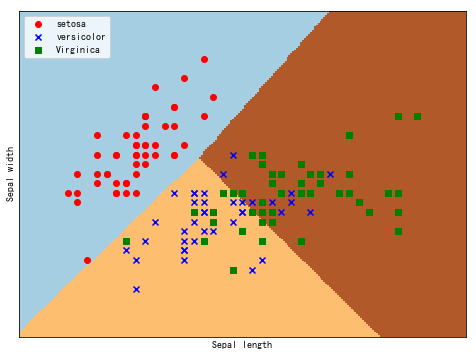

In [3]:
X = iris.data[:, :2]
Y = iris.target

lr = LogisticRegression(C=1e5)
lr.fit(X, Y)
# 生成两个网格矩阵
h = 0.02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
 
# 预测
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
 
# 绘制
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 'x', label = 'versicolor')
plt.scatter(X[100:, 0], X[100:, 1], color = 'green', marker = 's', label = 'Virginica')
 
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc=2)
plt.show()

# 上面是用sklearn的做的，下面我们自己写代码来实现一下iris数据集和癌症数据集的分类

最后的模型得分为:1.0
最后的预测值为: [0.93292947 0.98717455 0.15541379 0.01786837 0.03909442 0.01972689
 0.05214631 0.99683149 0.98092348 0.75469962 0.0473811  0.00362352
 0.27122595 0.03909442 0.84902103 0.80627393 0.83574223 0.33477608
 0.06921637 0.21582553 0.0240109  0.1836441  0.98092348 0.98947619
 0.08342411]


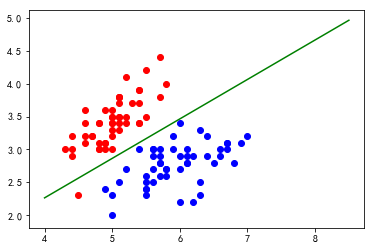

In [17]:
from sklearn.metrics import accuracy_score
 
class LogisticRegression(object):
    def __init__(self):
        """初始化Logistic Regression模型"""
        self.coef = None
        self.intercept = None
        self._theta = None
 
    def sigmoid(self, t):
        return 1. / (1. + np.exp(-t))
 
    def fit(self, X_train, y_train, alpha=0.01, n_iters=1e4):
        """使用梯度下降法训练LR模型"""
        assert  X_train.shape[0] == y_train.shape[0] #判断长度是否相等
 
        def J(theta, X_b, y):
            y_hat = self.sigmoid(X_b.dot(theta))
            try:
                return -np.sum(y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
            except:
                return float('inf')
 
        def dJ(theta, X_b, y):
            #求导后公式
            return X_b.T.dot(self.sigmoid(X_b.dot(theta)) - y) / len(y)
 
        def gradient_descent(X_b, y, initial_theta, alpha, n_iters=1e4, epsilon=1e-8):
            theta = initial_theta
            cur_iter = 0
 
            while cur_iter < n_iters:
                gradient = dJ(theta, X_b, y)
                last_theta = theta
                theta = theta - alpha * gradient
                if abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon:
                    break
                cur_iter += 1
            return theta
 
        X_b = np.hstack([np.ones((len(X_train), 1)), X_train])
        initial_theta = np.zeros(X_b.shape[1])
        self._theta = gradient_descent(X_b, y_train, initial_theta, alpha, n_iters)
 
        #截距
        self.intercept = self._theta[0]
        #x_i前的参数
        self.coef = self._theta[1:]
 
        return self
 
    def predict_proba(self, X_predict):
        """给定待预测数据集X_predict, 返回表示X_predict的结果概率向量"""
        assert self.intercept is not None and self.coef is not None
        assert X_predict.shape[1] == len(self.coef)
        X_b = np.hstack([np.ones((len(X_predict), 1)), X_predict])
        return self.sigmoid(X_b.dot(self._theta))
 
    def predict(self, X_predict):
        """给定待预测数据集X_predict, 返回表示X_predict的结果向量"""
        assert self.intercept is not None and self.coef is not None
        assert X_predict.shape[1] == len(self.coef)
        prob = self.predict_proba(X_predict)
        return np.array(prob >= 0.5, dtype='int')
 
    def score(self, X_test, y_test):
        """根据测试数据集X_test和y_test确定当前模型的准确度"""
        y_predict = self.predict(X_test)
        return accuracy_score(y_test, y_predict)
 
    def __repr__(self):
        return "LogisticRegression()"

    
#取鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target
#筛选特征
X = X[y<2, :2]
y = y[y<2]

 
#切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
 
#调用自己写的逻辑回归函数
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
k,b=log_reg.coef,log_reg.intercept

print("最后的模型得分为:%s" % log_reg.score(X_test, y_test))
print("最后的预测值为:", log_reg.predict_proba(X_test))


xx =np.linspace(4.0,8.5,10)
yy=-(b+k[0]*xx)/k[1]

#绘制图像
plt.figure()
plt.plot(xx,yy,'green')
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue")
plt.show()

# 开始处理癌症数据集

In [4]:
#导入癌症数据集
dataset = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['cancer'] = [dataset.target_names[t] for t in dataset.target]

#查看数据
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [5]:
#设置训练数据
X = dataset.data
y = dataset.target
n_features = X.shape[1]

#对数据归一化处理
std=X.std(axis=0)
mean=X.mean(axis=0)
X_norm = (X - mean) / std

def add_ones(X):
    ones=np.ones((X.shape[0],1))
    X_with_ones=np.hstack((ones, X))
    return X_with_ones

X_with_ones = add_ones(X_norm)

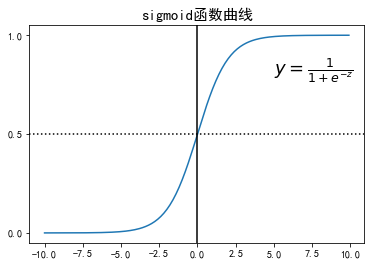

In [6]:
#sigmoid函数
def sigmoid(x):
    z=1.0/(1.0+np.exp(-x))
    z=z.reshape(z.shape[0],1)
    return z

#画出sigmoid函数的图像
x=np.arange(-10,10,0.1)
h=sigmoid(x)
plt.plot(x,h)
plt.axvline(0.0,color='k')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.title(r'sigmoid函数曲线',fontsize=15)
plt.text(5,0.8,r'$y=\frac{1}{1+e^{-z}}$',fontsize=18)
plt.show()

In [7]:
#模型
def model(theta, X):
    z = np.sum(theta.T * X, axis=1)
    return sigmoid(z)

#cross_entropy
def cross_entropy(y, y_hat):
    n_samples = y.shape[0]
    return sum(-y*np.log(y_hat)-(1-y)*np.log(1-y_hat))/n_samples

#损失函数
def cost_function(theta, X, y):
    y_hat = model(theta, X)
    return cross_entropy(y, y_hat)

#优化函数
def optimize(theta,X,y):
    n = X.shape[0]
    alpha = 1e-1
    y_hat = model(theta,X)
    dtheta = (1.0/n) * ((y_hat-y)*X)
    dtheta = np.sum(dtheta, axis=0)
    dtheta=dtheta.reshape((31,1))
    theta = theta - alpha * dtheta
    return theta

#模型评估
def predict_proba(theta, X):
    y_hat=model(theta, X)
    return y_hat

def predict(X, theta):
    y_hat=predict_proba(theta,X)
    y_hard=(y_hat > 0.5) * 1
    return y_hard

def accuracy(theta, X, y):
    y_hard=predict(X, theta)
    count_right=sum(y_hard == y)
    return count_right*1.0/len(y)


#迭代
def iterate(theta,X,y,times):
    costs = []
    accs = []
    for i in range(times):
        theta = optimize(theta,X,y)
        costs.append(cost_function(theta, X, y))
        accs.append(accuracy(theta, X, y))

    return theta, costs, accs


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_with_ones, y, test_size = 0.3, random_state=12345)
y_train=y_train.reshape((y_train.shape[0],1))
y_test=y_test.reshape((y_test.shape[0],1))

In [9]:
theta = np.ones((n_features+1,1))
theta, costs, accs = iterate(theta, X_train, y_train, 1500)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


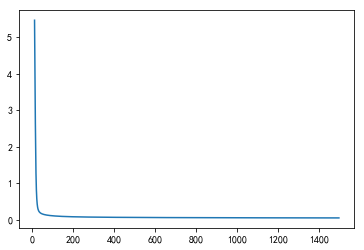

In [10]:
plt.plot(costs)

In [11]:
print("模型最终损失率为:{},模型的准确率为:{}".format(costs[-1], accs[-1]))

模型最终损失率为:[0.0489982],模型的准确率为:[0.99246231]


In [12]:
print("测试集上的准确率为:",accuracy(theta, X_test, y_test))

测试集上的准确率为: [0.97660819]
